In [1]:
using Pkg
Pkg.activate(".")
Pkg.add([
    PackageSpec(name="SimilaritySearch", version="0.8"),
    PackageSpec(name="Plots")
])

using SimilaritySearch, Plots

  Activating project at `~/Research/SimilaritySearchDemos/synthetic`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Research/SimilaritySearchDemos/synthetic/Project.toml`
  No Changes to `~/Research/SimilaritySearchDemos/synthetic/Manifest.toml`


# Creating a 2D dataset
This demonstration shows in a 2D example the functionalify of SearchGraph

In [2]:
n = 100_000

M = randn(Float32, 2, n)
db = MatrixDatabase(M)
size(M)

(2, 100000)

Once the dataset is created, the index should be also created

In [3]:
G = SearchGraph(db=db, dist=SqL2Distance())
push!(G.callbacks, OptimizeParameters(kind=ParetoRecall()))
index!(G)
IJulia.clear_output()

0

## The set of queries
We define a small set of queries being close to the border of the dataset and also in the most dense regions of the dataset. Please note how queries in low and high dense regions are located.

In [4]:
Q = [Float32[-2, -2], Float32[2, -2], Float32[-2, 0], Float32[-0, 2], Float32[0, 0],   Float32[-3, 3],  Float32[4, 4], Float32[1, 0.5]]
I, D = searchbatch(G, Q, 30)

(Int32[98815 7027 … 25466 33957; 9335 53396 … 79655 1723; … ; 57340 52198 … 6660 38495; 10204 2942 … 23152 74342], Float32[0.00054124306 0.000135366 … 2.1080647 5.198578f-5; 0.0030915157 0.0031332395 … 2.8279095 7.349418f-5; … ; 0.040799715 0.037854195 … 5.922067 0.0016236609; 0.042868108 0.041628595 … 6.000818 0.0016360518])

## Plot

Now let us illustrate our problem and solutions. In the following figure, datasets points are coloured with cyan, queries in red (with a big marker to remark them), and finally, the result set is plotted with dark blue points.

Note that the dataset distributes globular since it was generated with randn. We selected $Q$ to be in both dense and sparse regions, some of they can be think as outlayers. Queries in low and highly dense regiones are correctly solved.

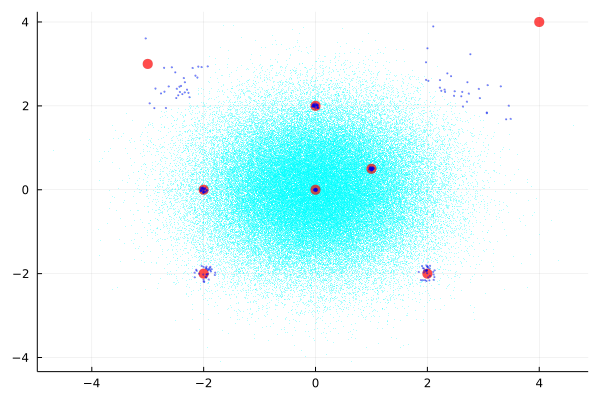

In [5]:
scatter(view(M, 1, :), view(M, 2, :), fmt=:png, c=:cyan, ma=0.3, a=0.3, ms=1, msw=0)

scatter!(getindex.(Q, 1), getindex.(Q, 2), c=:red, ma=0.7, a=0.7, ms=6, msw=0)

for c in eachcol(I)
    X = M[:, c]
    scatter!(view(X, 1, :), view(X, 2, :), c=:blue, ma=0.5, a=0.5, ms=2, msw=0)
    #scatter!( c=:auto, ms=2)
end

plot!(legend=nothing)
#scatter!(getindex.(Q, 1), getindex.(Q, 2), c=:red, ma=0.7, a=0.7, ms=4, markerstrokewidth=0, legend=nothing)

Since points are distributed in several regions with disparate density, their radii are also quite dirverse. The next figure illustrates this effect.

# Distribution of distances for the set of queries.

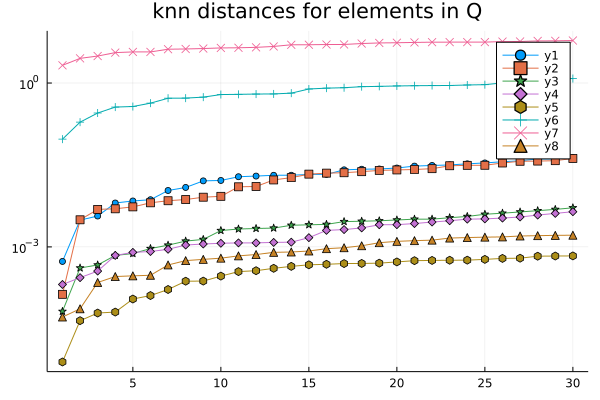

In [6]:
plot(D, m=:auto, yscale=:log10, title="knn distances for elements in Q", fmt=:png)